# EDA of Game Dataset

## About

The purpose of this project is to create a ML model to predict the success of a game.

The minimum required to complete this project would be to convert all non-numerical features into a numerical format that the algorithm can understand, and to decide which feature(s) to use to measure a games success.


## Dataset

When performing EDA we can take a top-down approach by examining attributes of the entire dataset.

This can help us be more mindful of issues that exist on the individual feature level.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from IPython.display import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from time import sleep
import matplotlib.image as mpimg
from io import BytesIO
from PIL import Image
import re


sns.set_style('darkgrid')
games_df = pd.read_csv('../data/raw/games.csv', index_col=0)

In [2]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30250 entries, 0 to 30249
Data columns (total 26 columns):
id                  30250 non-null int64
Name                30156 non-null object
RawgID              30156 non-null float64
SteamURL            30195 non-null object
Metacritic          3356 non-null float64
Genres              27282 non-null object
Indie               30045 non-null float64
Presence            30156 non-null float64
Platform            30123 non-null object
Graphics            25930 non-null object
Storage             27491 non-null object
Memory              28316 non-null object
RatingsBreakdown    15044 non-null object
ReleaseDate         27024 non-null object
Soundtrack          30045 non-null float64
Franchise           5087 non-null object
OriginalCost        29504 non-null object
DiscountedCost      727 non-null object
Players             12334 non-null object
Controller          29976 non-null float64
Languages           30027 non-null object
ESRB    

Let's change the column names to be pythonic:

In [3]:
games_df.rename(columns={'RawgID': 'rawg_id', 'SteamURL': 'steam_url', 'ESRB': 'esrb'}, inplace=True)

In [4]:
def convert_col_name(camel_case_name):
    snake_case_name = re.sub(r'(?<!^)(?=[A-Z])', '_', camel_case_name).lower()
    return snake_case_name

In [5]:
games_df.columns = [convert_col_name(col_name) for col_name in games_df.columns]

### Dealing with Duplicates

In [6]:
games_df.duplicated().sum()

0

It looks like there are no completely duplicated observtions, though when we begin to analyze the features that should be unique (id like features) then we will have a better sense of whether or not we have any duplicates.

### Check for NaN values:

In [7]:
games_df.isna().sum()

id                       0
name                    94
rawg_id                 94
steam_url               55
metacritic           26894
genres                2968
indie                  205
presence                94
platform               127
graphics              4320
storage               2759
memory                1934
ratings_breakdown    15206
release_date          3226
soundtrack             205
franchise            25163
original_cost          746
discounted_cost      29523
players              17916
controller             274
languages              223
esrb                 25503
achievements            94
publisher            30250
description            219
tags                   205
dtype: int64

There are a lot of missing values. We are going to have to deal with each of these features individually and come up with a solution for each.

### id

Database primary key. Indicates the order the games were entered.

Unique identifier's are usually not helpful for modeling any relationship, but this id is different.

It represents the order the games were scraped, which was originally sorted by popularity, so it can actually be used as our predicted variable (y).


In [8]:
print(f"Unique: {games_df['id'].nunique()}/{games_df.shape[0]}")
print(f"Nan: {games_df['id'].isna().sum()}")

Unique: 30250/30250
Nan: 0


We are going to change the name of the 'id' column to 'steam_popularity':

In [9]:
games_df.rename(columns={'id': 'steam_popularity'})

steam_popularity                              name   rawg_id  \
0                     1  Counter-Strike: Global Offensive    4291.0   
1                     2                         Destiny 2      32.0   
2                     3                            Dota 2   10213.0   
3                     4          The Elder Scrolls Online   41458.0   
4                     5                    Sea of Thieves   50781.0   
...                 ...                               ...       ...   
30245             30246                        Thirty Two  262427.0   
30246             30247                  Highlight (itch)  140231.0   
30247             30248                        HappyBlock  175336.0   
30248             30249                       Bubble Rush   47221.0   
30249             30250                 Fancy Trangram VR   16615.0   

                                               steam_url  metacritic  \
0      https://store.steampowered.com/app/730/?snr=1_...        83.0   
1      https://store.steampowered.com/app/1085660/?sn...        82.0   
2      https://store.steampowered.com/app/570/?snr=1_...        90.0   
3      https://store.steampowered.com/app/306130/?snr...        71.0   
4      https://store.steampowered.com/app/1172620/?sn...        68.0   
...                                                  ...         ...   
30245  https://store.steampowered.com/app/977290/?snr...         NaN   
30246  https://store.steampowered.com/app/1108380/?sn...         NaN   
30247  https://store.steampowered.com/app/919240/?snr...         NaN   
30248  https://store.steampowered.com/app/717910/?snr...         NaN   
30249  https://store.steampowered.com/app/552240/?snr...         NaN   

                                 genres  indie   presence  \
0                  Action, Free to Play    0.0  1009588.0   
1       Action, Adventure, Free to Play    0.0  1007425.0   
2                                   NaN    0.0  1009306.0   
3            Massively Multiplayer, RPG    0.0  1000781.0   
4                     Action, Adventure    0.0   777456.0   
...                                 ...    ...        ...   
30245                     Casual, Indie    1.0      105.0   
30246                             Indie    1.0       13.0   
30247                            Casual    0.0       11.0   
30248  Action, Adventure, Casual, Indie    1.0      423.0   
30249                               NaN    0.0      120.0   

                                                platform  \
0                            PC, Xbox 360, PlayStation 3   
1      PlayStation 5, Web, Xbox Series X, PC, Xbox On...   
2                                       Linux, macOS, PC   
3                                                     PC   
4                                           PC, Xbox One   
...                                                  ...   
30245                                                 PC   
30246                                                 PC   
30247                                                 PC   
30248                                                 PC   
30249                                                 PC   

                                                graphics  ... original_cost  \
0      Video card must be 256 MB or more and should b...  ...  Free to Play   
1      NVIDIA® GeForce® GTX 660 2GB or GTX 1050 2GB /...  ...  Free To Play   
2                             nVidia GeForce 8600/9600GT  ...  Free to Play   
3      Direct X 11.0 compliant video card with 1GB RA...  ...        $19.99   
4              Nvidia GeForce GTX 650 or AMD Radeon 7750  ...        $39.99   
...                                                  ...  ...           ...   
30245                                              128mb  ...         $0.99   
30246                             Intel UHD Graphics 620  ...         $0.99   
30247                                                NaN  ...         $1.99   
30248                                        

## Name
Original title of the game. 

In [10]:
print(f"Unique: {games_df['name'].nunique()}/{games_df.shape[0]}")
print(f"Nan: {games_df['name'].isna().sum()}")

Unique: 27407/30250
Nan: 94


First let's address the Nan values:

In [11]:
games_df[games_df['name'].isna()].isna().sum()

KeyError: 'Name'

These Nans will have to be dropped, since the 'Name' features is what links the Steam data to the RAWG data.

As we can see above, any of the 94 games that have Nan title also is missing all RAWG data.

In [12]:
games_df[games_df['name'].duplicated()]['name'].value_counts()

7 Billion Humans                         221
InMind VR                                 33
Fight Night: Knight Fight                 14
The Oil Blue: Steam Legacy Edition        12
Grand Theft Auto V                        11
                                        ... 
MONMUSU                                    1
Point Blank                                1
Fairy Tale Mysteries 2: The Beanstalk      1
VCB: Why City                              1
Commandos 2: Men of Courage                1
Name: name, Length: 1790, dtype: int64

We will probably be dropping all 1,790 duplicate games. 

It's worth exploring deeper though in case we can devise a solution.

### Exploring Deeper:
Starting with FIFA 20

In [13]:
games_df[games_df['name'] == 'FIFA 20']

id     name   rawg_id  \
23380  23381  FIFA 20  326229.0   
24266  24267  FIFA 20  326229.0   
30242  30243  FIFA 20  326229.0   

                                               steam_url  metacritic  \
23380  https://store.steampowered.com/app/955890/?snr...        68.0   
24266  https://store.steampowered.com/app/1220690/?sn...        68.0   
30242  https://store.steampowered.com/app/1156320/?sn...        68.0   

                   genres  indie   presence  \
23380                 NaN    1.0  1000735.0   
24266  Casual, Simulation    0.0  1000735.0   
30242     Indie, Strategy    1.0  1000736.0   

                                           platform  \
23380  Nintendo Switch, PlayStation 4, Xbox One, PC   
24266  Nintendo Switch, PlayStation 4, Xbox One, PC   
30242  Nintendo Switch, PlayStation 4, Xbox One, PC   

                                                graphics  ... original_cost  \
23380  Nvidia GeForce GTX970 / AMD Radeon R9 290 equi...  ...        $29.99   
24266               Graphics card with DX10 capabilities  ...         $2.99   
30242                                 Intel® HD Graphics  ...         $4.99   

      discounted_cost       players controller  \
23380             NaN           NaN        1.0   
24266             NaN           NaN        0.0   
30242             NaN  singleplayer        0.0   

                                languages      esrb achievements publisher  \
23380  English, Japanese, German, Russian  Everyone         63.0       NaN   
24266                             English  Everyone         63.0       NaN   
30242                             English  Everyone         63.0       NaN   

                                             description  \
23380  Powered by Frostbite™*, EA SPORTS™ FIFA 20 for...   
24266  Powered by Frostbite™*, EA SPORTS™ FIFA 20 for...   
30242  Powered by Frostbite™*, EA SPORTS™ FIFA 20 for...   

                                                    tags  
23380  Action, Simulation, Indie, Casual, Adventure, ...  
24266   Casual, Simulation, Relaxing, Music, Atmospheric  
30242  Indie, Strategy, Puzzle, Singleplayer, Platformer  

[3 rows x 26 columns]

### Investigate the Mislabeled Data:
Time to check the URLS manually and see if they are all incorrect.

To do this we will use Selenium to load the game page and take a screenshot which it will save in memory, then use matplotlib to show the img so we can compare visually whether or not the titles match:

In [14]:
fifa_imgs = []
for url in games_df[games_df['name'] == 'FIFA 20']['steam_url'].values:
    driver = webdriver.Safari()
    driver.get(url)
    sleep(1)

    fifa_imgs.append(driver.get_screenshot_as_png())
    driver.quit()

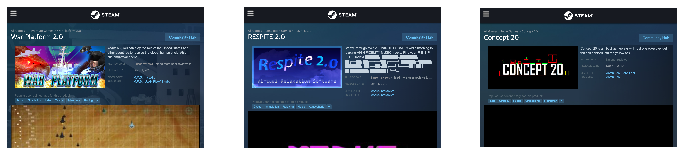

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
for ax, png in zip(ax.flatten(), fifa_imgs):
    img = Image.open(BytesIO(png))
    ax.imshow(img)
    ax.grid(False)
    ax.axis('off')

All of the three games with the Name 'FIFA 20' are incorrect and point to different games.


### Are all the games incorrect?!
At this point it's important to check samples from the data to make sure this is an isolated issue.

We will do the same thing except now we will draw random samples from our dataset:

In [16]:
random_imgs = {
    'titles': [],
    'imgs': []
}
for idx, game in games_df.sample(9).iterrows():
    driver = webdriver.Safari()
    driver.get(game['steam_url'])
    sleep(1)

    random_imgs['titles'].append(game['name'])
    random_imgs['imgs'].append(driver.get_screenshot_as_png())
    driver.quit()

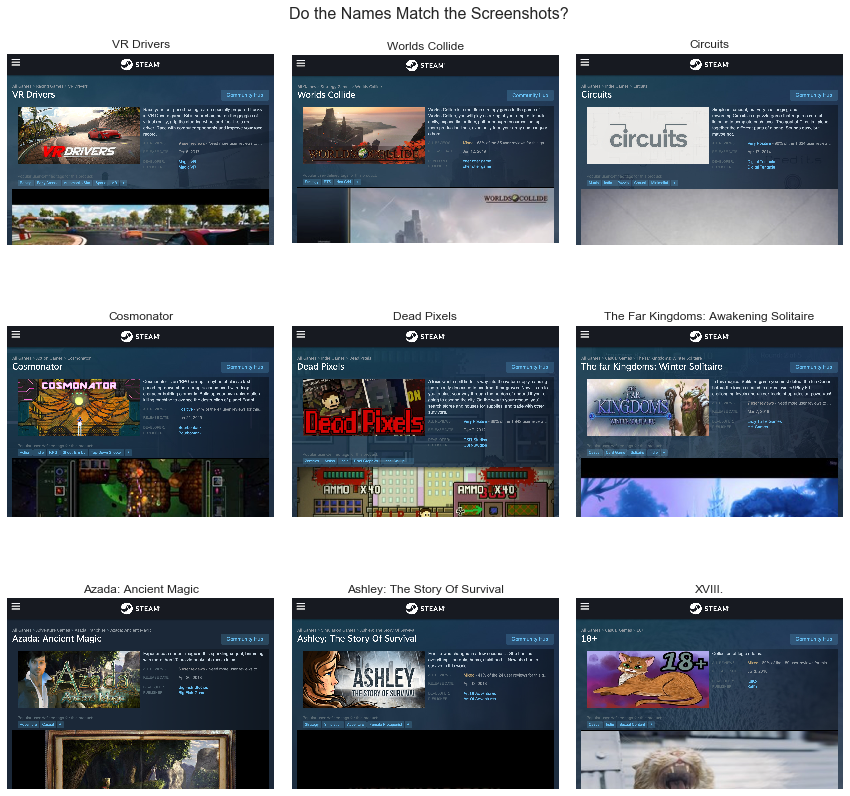

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for ax, title, img in zip(ax.flatten(), random_imgs['titles'], random_imgs['imgs']):
    img = Image.open(BytesIO(img))
    ax.imshow(img)
    ax.grid(False)
    ax.axis('off')
    ax.set_title(title)
plt.tight_layout()
fig.suptitle('Do the Names Match the Screenshots?', fontsize=16);


Okay, so these all have the correct title.

At this point I think its safe to assume the duplicates are the only games effected. We will keep a watchful eye however in case any other issues come up.

### Why so many copies of 7 Billion Humans

Thats a lot of games with the name '7 Billion Humans'. Let's inspect this further.

In [18]:
games_df[games_df['name'] == '7 Billion Humans'].head(3)

id              name  rawg_id steam_url  metacritic genres  indie  \
798    799  7 Billion Humans  52005.0         /         NaN    RPG    NaN   
871    872  7 Billion Humans  52005.0       NaN         NaN    NaN    NaN   
1035  1036  7 Billion Humans  52005.0       NaN         NaN    NaN    NaN   

      presence                                platform graphics  ...  \
798    53317.0  PC, macOS, iOS, Linux, Nintendo Switch      NaN  ...   
871    53317.0  PC, macOS, iOS, Linux, Nintendo Switch      NaN  ...   
1035   53317.0  PC, macOS, iOS, Linux, Nintendo Switch      NaN  ...   

     original_cost discounted_cost players controller  languages esrb  \
798         $49.99             NaN     NaN        NaN        NaN  NaN   
871            NaN             NaN     NaN        NaN        NaN  NaN   
1035           NaN             NaN     NaN        NaN        NaN  NaN   

     achievements publisher  \
798          19.0       NaN   
871          19.0       NaN   
1035         19.0       NaN   

                                            description  tags  
798   Automate swarms of office workers to solve puz...   NaN  
871   Automate swarms of office workers to solve puz...   NaN  
1035  Automate swarms of office workers to solve puz...   NaN  

[3 rows x 26 columns]

So we can see that for each of these games, the SteamURL is either '/' or nan. 

It must have been an error with the gathering process. Let's make sure by selecting all rows that have either '/' nan:

In [19]:
games_df[games_df['steam_url'].isin([np.nan, '/'])]['name'].value_counts()

7 Billion Humans         221
140                        1
24/7 Sorcerer's Arena      1
Name: name, dtype: int64

We can see there is indeed an error and all of the '7 Billion Humans' show up along with 140 (?) and 24/7 Sorcerer's Arena.

### InMind VR
The next game on the list with far too many duplicates:

In [20]:
games_df[games_df['name'] == 'InMind VR'].head(3)

id       name  rawg_id  \
919    920  InMind VR  13575.0   
1849  1850  InMind VR  13575.0   
2036  2037  InMind VR  13575.0   

                                              steam_url  metacritic genres  \
919   https://store.steampowered.com/app/751440/?snr...         NaN    NaN   
1849  https://store.steampowered.com/app/1264180/?sn...         NaN    NaN   
2036  https://store.steampowered.com/app/954280/?snr...         NaN    NaN   

      indie  presence               platform  \
919     0.0   82271.0  iOS, Linux, PC, macOS   
1849    0.0   82271.0  iOS, Linux, PC, macOS   
2036    1.0   82271.0  iOS, Linux, PC, macOS   

                                               graphics  ... original_cost  \
919   NVIDIA GTX 970 or GTX 1060 or better/ AMD R9 2...  ...        $49.99   
1849                                    NVIDIA GTX 1060  ...   Demo Sample   
2036                                     Nvidia Gtx 960  ...           NaN   

     discounted_cost       players controller          languages esrb  \
919              NaN  singleplayer        1.0  English, Japanese  NaN   
1849             NaN           NaN        1.0            English  NaN   
2036             NaN  singleplayer        1.0            English  NaN   

     achievements publisher  \
919           0.0       NaN   
1849          0.0       NaN   
2036          0.0       NaN   

                                            description  \
919   InMind is a short scientific adventure with ar...   
1849  InMind is a short scientific adventure with ar...   
2036  InMind is a short scientific adventure with ar...   

                                                   tags  
919   Sexual Content, Nudity, Mature, VR, Anime, Dat...  
1849  Simulation, VR, Experience, Relaxing, Realisti...  
2036  Action, Adventure, Utilities, Early Access, VR...  

[3 rows x 26 columns]

Thankfully these games have valid URL's so we can once again use Selenium to fetch some screenshots of the game landing pages for us to compare:

In [21]:
vr_imgs = []
for idx, game in games_df[games_df['name'] == 'InMind VR'].sample(9).iterrows():
    driver = webdriver.Safari()
    driver.get(game['steam_url'])
    sleep(1)
    vr_imgs.append(driver.get_screenshot_as_png())
    driver.quit()

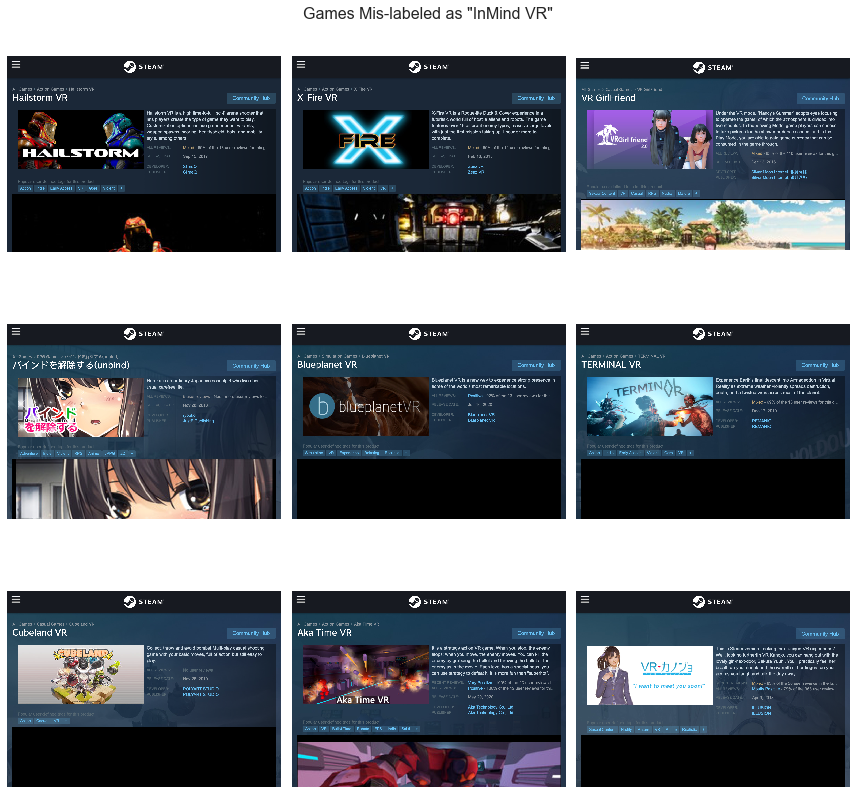

In [22]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for ax, img in zip(ax.flatten(), vr_imgs):
    img = Image.open(BytesIO(img))
    ax.imshow(img)
    ax.grid(False)
    ax.axis('off')
plt.tight_layout()
fig.suptitle('Games Mis-labeled as "InMind VR"', fontsize=16);

Okay, after visiting the urls it turns out that the games that are tagged as 'VR' are somehow all classified as this 'InMind VR'.

We could fill these in manually since we have the urls, however we are not too concerned with VR for now.

Instead of carrying on this way we will go ahead and drop duplicates, since there are less than 300 and most of those are from the '7 Billion Humans' error.

### Solutions:
- Drop all games with '/' or nan as the SteamURL
- Drop all duplicate games, as they have been wrong so far.
- Drop any games with 'Nan' as the Name

In [23]:
games_df = games_df[~games_df['name'].isin(['/', np.nan])]

In [24]:
games_df.drop_duplicates(subset='name', inplace=True)

In [25]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27407 entries, 0 to 30249
Data columns (total 26 columns):
id                   27407 non-null int64
name                 27407 non-null object
rawg_id              27407 non-null float64
steam_url            27407 non-null object
metacritic           2861 non-null float64
genres               24858 non-null object
indie                27397 non-null float64
presence             27407 non-null float64
platform             27380 non-null object
graphics             23652 non-null object
storage              25087 non-null object
memory               25885 non-null object
ratings_breakdown    12953 non-null object
release_date         24417 non-null object
soundtrack           27397 non-null float64
franchise            4670 non-null object
original_cost        26828 non-null object
discounted_cost      667 non-null object
players              11346 non-null object
controller           27355 non-null float64
languages            27405 non

## RawgID
Another feature that should be a unique identifier.

Not super important because we will be dropping it since it is useless for modeling, but it might be worthwile to checkout and try to gain some insight about the other features.


In [26]:
print(f"Unique: {games_df['rawg_id'].nunique()}/{games_df['rawg_id'].shape[0]}")
print(f"Nan: {games_df['rawg_id'].isna().sum()}")
print(f"Ranges from {games_df['rawg_id'].min()} to {games_df['rawg_id'].max()}")

Unique: 27407/27407
Nan: 0
Ranges from 2.0 to 463726.0


### Solution:
- Dropping this column since it will be useless for our project

## SteamURL
Very important feature for troubleshooting since we can look up the page if we have any questions about the data, just like we did above. 

Not useful for our project however as its another unique feature.

In [27]:
print(f"Unique: {games_df['steam_url'].nunique()}")
print(f"Nan: {games_df['steam_url'].isna().sum()}")

Unique: 27406
Nan: 0


### Solutions:
- Drop this feature for the modeling and analysis phase

## Metacritic
The score given to the game from the Metacritic organization

This feature could potentially be valuable, however it is missing a large percentage of values.

In [28]:
print(f"Unique: {games_df['metacritic'].nunique()}")
print(f"Nan: {games_df['metacritic'].isna().sum()}")
print(f"Actual Number of Ratings: {games_df['metacritic'].shape[0] - games_df['metacritic'].isna().sum()}")
print(f"Range: {games_df['metacritic'].min()}-{games_df['metacritic'].max()}")

Unique: 71
Nan: 24546
Actual Number of Ratings: 2861
Range: 20.0-97.0


We have Metacritic scores for just over 10% of our dataset. Not great!

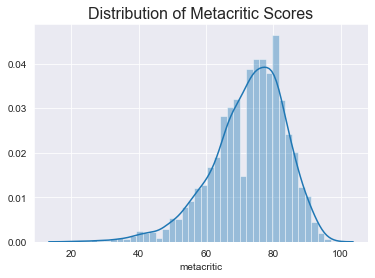

In [29]:
sns.distplot(games_df['metacritic'].dropna())
plt.title('Distribution of Metacritic Scores', fontsize=16);

The ratings that we have however have a pretty nice looking distribution, even though it's slightly left-skewed!

This tells us we don't have any outliers as these are all in the expected range.

### Solutions:
- Impute missing values? Usually if you have over 25% missing values it's better to drop the feature.

### Genres
A list of genres assigned to the game

In [30]:
print(f"Unique: {games_df['genres'].nunique()}/{games_df['genres'].shape[0]}")
print(f"Missing: {games_df['genres'].isna().sum()}")

Unique: 957/27407
Missing: 2549


That's a lot of missing values. Let's inspect and see:

In [31]:
games_df[games_df['genres'].isna()]

id                                  name   rawg_id  \
2          3                                Dota 2   10213.0   
18        19                       Half-Life: Alyx  392019.0   
23        24                           War Thunder    3678.0   
26        27                    Tabletop Simulator   10293.0   
41        42                              PAYDAY 2    3939.0   
...      ...                                   ...       ...   
30121  30122                             BoidWatch   45492.0   
30166  30167              Willie's Haunted Hayride   16618.0   
30215  30216  Holiday Simulator: Wacky Sleigh Ride   15299.0   
30223  30224                           Stratoscape  385484.0   
30249  30250                     Fancy Trangram VR   16615.0   

                                               steam_url  metacritic genres  \
2      https://store.steampowered.com/app/570/?snr=1_...        90.0    NaN   
18     https://store.steampowered.com/app/546560/?snr...        93.0    NaN   
23     https://store.steampowered.com/app/236390/?snr...        81.0    NaN   
26     https://store.steampowered.com/app/286160/?snr...         NaN    NaN   
41     https://store.steampowered.com/app/218620/?snr...        79.0    NaN   
...                                                  ...         ...    ...   
30121  https://store.steampowered.com/app/688050/?snr...         NaN    NaN   
30166  https://store.steampowered.com/app/552150/?snr...         NaN    NaN   
30215  https://store.steampowered.com/app/571180/?snr...         NaN    NaN   
30223  https://store.steampowered.com/app/1143130/?sn...         NaN    NaN   
30249  https://store.steampowered.com/app/552240/?snr...         NaN    NaN   

       indie   presence                                   platform  \
2        0.0  1009306.0                           Linux, macOS, PC   
18       0.0   185610.0                                         PC   
23       0.0  1005547.0  macOS, Linux, PC, PlayStation 4, Xbox One   
26       1.0   297488.0                           Linux, PC, macOS   
41       0.0  1001784.0                        PC, Linux, Xbox One   
...      ...        ...                                        ...   
30121    1.0      208.0                                         PC   
30166    0.0      104.0                                         PC   
30215    0.0      168.0                                         PC   
30223    0.0      194.0                                         PC   
30249    0.0      120.0                                         PC   

                                                graphics  ... original_cost  \
2                             nVidia GeForce 8600/9600GT  ...  Free to Play   
18                          GTX 1060 / RX 580 - 6GB VRAM  ...        $59.99   
23     Intel HD Graphics 4000 / AMD Radeon 46XX / NVI...  ...  Free to Play   
26     Graphics card with DX10 (shader model 4.0) cap...  ...        $19.99   
41                                                   NaN  ...         $9.99   
...                                                  ...  ...           ...   
30121                                     Nvidia GTX 970  ...         $0.99   
30166                                  GTX 970 or Higher  ...         $0.99   
30215                                      GeForce 970 +  ...         $0.99   
30223     NVIDIA GTX 1060 / AMD Radeon RX 480 or greater  ...         $1.99   
30249                                             GTX970  ...         $0.99   

      discounted_cost                                       players  \
2                 NaN           multiplayer, pvp, coop, online coop   
18             $44.99                                  singleplayer   
23                NaN                             multiplayer, coop   
26                NaN  singleplayer, multiplayer, coop, online coop   
41                NaN  singleplayer, multiplayer, coop, online coop   
...               ...                                           ...   
30121

It may be possible to impute the missing genres from the Tags, since most of the games have indicators there.

There are over 1007 unique values because each genre can be a combination of several individual genres.

We can go ahead and split up the genres and see if it is possible to encode them.

In [32]:
games_df['genres'].value_counts()

Action, Indie                                                                              1770
Casual, Indie                                                                              1332
Action, Adventure, Indie                                                                   1259
Adventure, Indie                                                                           1232
Action, Casual, Indie                                                                       887
                                                                                           ... 
Action, Casual, Indie, Massively Multiplayer, Sports, Early Access                            1
Action, Adventure, Casual, Massively Multiplayer, RPG, Strategy                               1
Action, Adventure, Casual, RPG, Simulation, Strategy                                          1
Adventure, Free to Play, Indie, Massively Multiplayer                                         1
Action, Adventure, Casual, Free to Play,

In [33]:
games_df['genres']

0                    Action, Free to Play
1         Action, Adventure, Free to Play
2                                     NaN
3              Massively Multiplayer, RPG
4                       Action, Adventure
                       ...               
30245                       Casual, Indie
30246                               Indie
30247                              Casual
30248    Action, Adventure, Casual, Indie
30249                                 NaN
Name: genres, Length: 27407, dtype: object

In [34]:
games_df['genres'].fillna('missing', inplace=True)

In [35]:
total_genres = []
def add_genres(genres):
    for genre in genres.split(', '):
        if genre not in total_genres:
            total_genres.append(genre)

In [36]:
games_df['genres'].apply(add_genres);

In [37]:
total_genres

['Action',
 'Free to Play',
 'Adventure',
 'missing',
 'Massively Multiplayer',
 'RPG',
 'Indie',
 'Simulation',
 'Strategy',
 'Early Access',
 'Racing',
 'Sports',
 'Casual',
 'Movie',
 'Audio Production',
 'Education',
 'Software Training',
 'Utilities',
 'Design & Illustration']

It looks like we have some non-games we can get rid of.

For our project we don't need to keep any utilities, software, movies, etc.

In [38]:
genres_to_drop = ['Movie', 'Audio Production', 'Education', 
                  'Software Training', 'Utilities', 'Design & Illustration']

In [39]:
games_df['genres'] = games_df['genres'].apply(lambda x: x.split(', '))

In [40]:
exploded_genres_df = games_df.explode('genres')

In [41]:
ids_to_drop = exploded_genres_df[exploded_genres_df['genres'].isin(genres_to_drop)]['id'].values

In [42]:
games_df = games_df[~games_df['id'].isin(ids_to_drop)]

In [43]:
games_df['genres'] = games_df['genres'].apply(lambda x: ', '.join(x))

In [44]:
total_genres = []
games_df['genres'].apply(add_genres);

In [45]:
total_genres

['Action',
 'Free to Play',
 'Adventure',
 'missing',
 'Massively Multiplayer',
 'RPG',
 'Indie',
 'Simulation',
 'Strategy',
 'Early Access',
 'Racing',
 'Sports',
 'Casual']

That was a lot of work to remove 3 games, but now we have narrowed down our genres and we can use encoding in our ML models

In [56]:
stacked = games_df['genres'].str.lower().str.split(', ', expand=True).stack()

In [57]:
one_hot_genres = pd.get_dummies(stacked, prefix='g').groupby(level=0).sum()

In [61]:
games_oh_df = pd.concat([games_df, one_hot_genres], axis=1).drop('genres', axis=1)

### Indie
Actually a duplicate feature now that we one-hot-encoded the genres. 

Let's check and make sure they are equal and then we will drop it.

In [78]:
games_oh_df.drop('indie', axis=1)

id                              name   rawg_id  \
0          1  Counter-Strike: Global Offensive    4291.0   
1          2                         Destiny 2      32.0   
2          3                            Dota 2   10213.0   
3          4          The Elder Scrolls Online   41458.0   
4          5                    Sea of Thieves   50781.0   
...      ...                               ...       ...   
30245  30246                        Thirty Two  262427.0   
30246  30247                  Highlight (itch)  140231.0   
30247  30248                        HappyBlock  175336.0   
30248  30249                       Bubble Rush   47221.0   
30249  30250                 Fancy Trangram VR   16615.0   

                                               steam_url  metacritic  \
0      https://store.steampowered.com/app/730/?snr=1_...        83.0   
1      https://store.steampowered.com/app/1085660/?sn...        82.0   
2      https://store.steampowered.com/app/570/?snr=1_...        90.0   
3      https://store.steampowered.com/app/306130/?snr...        71.0   
4      https://store.steampowered.com/app/1172620/?sn...        68.0   
...                                                  ...         ...   
30245  https://store.steampowered.com/app/977290/?snr...         NaN   
30246  https://store.steampowered.com/app/1108380/?sn...         NaN   
30247  https://store.steampowered.com/app/919240/?snr...         NaN   
30248  https://store.steampowered.com/app/717910/?snr...         NaN   
30249  https://store.steampowered.com/app/552240/?snr...         NaN   

        presence                                           platform  \
0      1009588.0                        PC, Xbox 360, PlayStation 3   
1      1007425.0  PlayStation 5, Web, Xbox Series X, PC, Xbox On...   
2      1009306.0                                   Linux, macOS, PC   
3      1000781.0                                                 PC   
4       777456.0                                       PC, Xbox One   
...          ...                                                ...   
30245      105.0                                                 PC   
30246       13.0                                                 PC   
30247       11.0                                                 PC   
30248      423.0                                                 PC   
30249      120.0                                                 PC   

                                                graphics  \
0      Video card must be 256 MB or more and should b...   
1      NVIDIA® GeForce® GTX 660 2GB or GTX 1050 2GB /...   
2                             nVidia GeForce 8600/9600GT   
3      Direct X 11.0 compliant video card with 1GB RA...   
4              Nvidia GeForce GTX 650 or AMD Radeon 7750   
...                                                  ...   
30245                                              128mb   
30246                             Intel UHD Graphics 620   
30247                                                NaN   
30248                                                NaN   
30249                                             GTX970   

                      storage       memory  ... g_early access g_free to play  \
0       15 GB available space     2 GB RAM  ...              0              1   
1      105 GB available space     6 GB RAM  ...              0              1   
2       15 GB available space     4 GB RAM  ...              0              0   
3       85 GB available space     3 GB RAM  ...              0              0   
4       50 GB available space     4 GB RAM  ...              0              0   
...                       ...          ...  ...            ...            ...   
30245    10 MB available spac   512 MB RAM  ...              0              0   
30246    2 GB available space     6 GB RAM  ...              0              0   
30247  2048 MB available spac  2048 MB RAM  ...              0              0   
30248  300 MB available space   500 MB R

### Presence

In [82]:
print(f"Unique: {games_oh_df['presence'].nunique()}")
print(f"Nan: {games_oh_df['presence'].isna().sum()}")

Unique: 7392
Nan: 0


In [90]:
games_oh_df['presence'].sort_values()

26109          0.0
14227          0.0
24129          0.0
1277           0.0
24110          0.0
           ...    
2        1009306.0
79       1009332.0
469      1009410.0
33       1009435.0
0        1009588.0
Name: presence, Length: 27404, dtype: float64

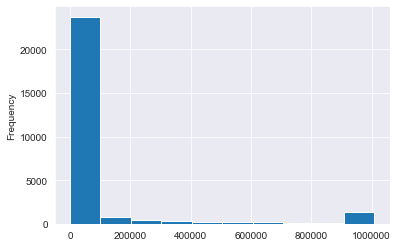

In [84]:
games_oh_df['presence'].plot.hist()

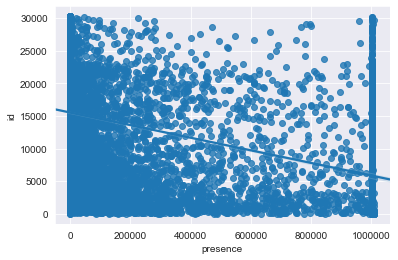

In [87]:
sns.regplot('presence', 'id', data=games_oh_df)

### Platform

In [217]:
basic_stats('Platform')

--------------------
Unique: 2041/30250
Missing: 127
--------------------
Too many unique values to plot!


### RatingsBreakdown

In [218]:
basic_stats('RatingsBreakdown')

--------------------
Unique: 4806/30250
Missing: 15206
--------------------
Too many unique values to plot!


### ReleaseDate

In [219]:
basic_stats('ReleaseDate')

--------------------
Unique: 4133/30250
Missing: 3226
--------------------
Too many unique values to plot!


### Soundtrack

--------------------
Unique: 2/30250
Missing: 205
--------------------


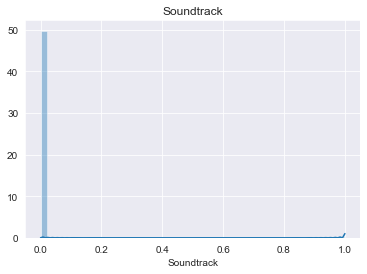

In [220]:
basic_stats('Soundtrack')

### Franchise

In [221]:
basic_stats('Franchise')

--------------------
Unique: 1866/30250
Missing: 25163
--------------------
Too many unique values to plot!


### OriginalCost

In [222]:
basic_stats('OriginalCost')

--------------------
Unique: 396/30250
Missing: 746
--------------------
Too many unique values to plot!


### DiscountedCost

In [223]:
basic_stats('DiscountedCost')

--------------------
Unique: 121/30250
Missing: 29523
--------------------
Too many unique values to plot!


### Players

In [224]:
basic_stats('Players')

--------------------
Unique: 29/30250
Missing: 17916
--------------------


TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Controller

--------------------
Unique: 2/30250
Missing: 274
--------------------


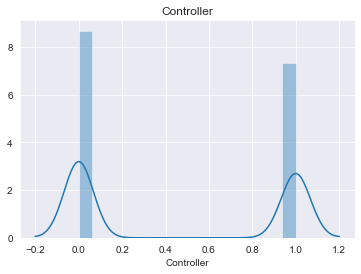

In [225]:
basic_stats('Controller')

### ESRB

In [226]:
basic_stats('ESRB')

--------------------
Unique: 6/30250
Missing: 25503
--------------------


TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Achievements

--------------------
Unique: 448/30250
Missing: 94
--------------------


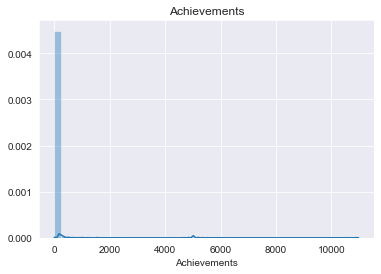

In [227]:
basic_stats('Achievements')

### Publisher

--------------------
Unique: 0/30250
Missing: 30250
--------------------


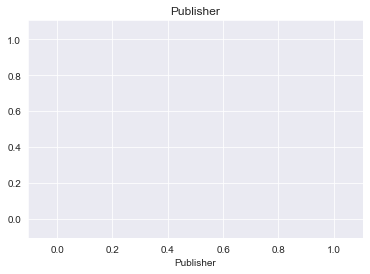

In [228]:
basic_stats('Publisher')

### Languages

In [229]:
basic_stats('Languages')

--------------------
Unique: 3196/30250
Missing: 223
--------------------
Too many unique values to plot!


### Graphics

In [230]:
basic_stats('Graphics')

--------------------
Unique: 10546/30250
Missing: 4320
--------------------
Too many unique values to plot!


### Storage

In [231]:
basic_stats('Storage')

--------------------
Unique: 2067/30250
Missing: 2759
--------------------
Too many unique values to plot!


### Memory

In [232]:
basic_stats('Memory')

--------------------
Unique: 699/30250
Missing: 1934
--------------------
Too many unique values to plot!


### Tags

In [233]:
basic_stats('Tags')

--------------------
Unique: 24866/30250
Missing: 205
--------------------
Too many unique values to plot!


### Description

In [234]:
basic_stats('Description')

--------------------
Unique: 27271/30250
Missing: 219
--------------------
Too many unique values to plot!
